<h1 style="text-align: center">Ομαδική Εργασία 2<h1>
<h3 style="text-align: center">Σπανάκης Δημήτριος - 1115201800183</h3>
<h3 style="text-align: center">Σγούρδας Δημήτριος - 1115201800173</h3>

<h1>1. Προετοιμασία δεδομένων</h1>

<h2>Προεπεξεργασία - Καθάρισμα</h2>
<p style="font-size:16px">
Για την διαχείριση των Missing Data επιλέξαμε να πετάμε τα rows τα οποία έχουν κενές τιμές (μιας και δεν υπήρχαν Null πεδία). Στην συνέχεια, για την προεπεξεργασία των δεδομένων μας, επιλέξαμε να μετατρέψουμε όλα τα κεφαλαία γράμματα σε πεζά, να αφαιρέσουμε όλα τα σημεία στίξης (αποστρόφους, τελείες κλπ.) και τέλος να αφαιρέσουμε τα πιο συνηθισμένα stopwords.
</p>

In [1]:
  from google.colab import drive
drive.mount('/content/gdrive')
curPath = "/content/gdrive/My Drive/TEDE - Ergasia2/"

Mounted at /content/gdrive


In [2]:
fake_file = curPath + 'Fake.csv'
true_file = curPath + 'True.csv'

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
!pip install wordcloud
from wordcloud import WordCloud


stop = stopwords.words('english')

# Load the data sets
dfTrue = pd.read_csv(true_file)
dfFake = pd.read_csv(fake_file)
# Remove rows with empty columns
dfTrue=dfTrue[dfTrue.text != ' ']
dfFake=dfFake[dfFake.text != ' ']
dfTrue['title'].dropna(inplace=True)
dfFake['text'].dropna(inplace=True)
# Make all letters lower case and remove puncuation
dfTrue["title"] = dfTrue['title'].str.replace('[^\w\s]','').str.lower()
dfTrue["text"] = dfTrue['text'].str.replace('[^\w\s]','').str.lower()
dfFake["title"] = dfFake['title'].str.replace('[^\w\s]','').str.lower()
dfFake["text"] = dfFake['text'].str.replace('[^\w\s]','').str.lower()

# dfTrue

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<h2>Μελέτη δεδομένων</h2>

True Tweets Word Cloud


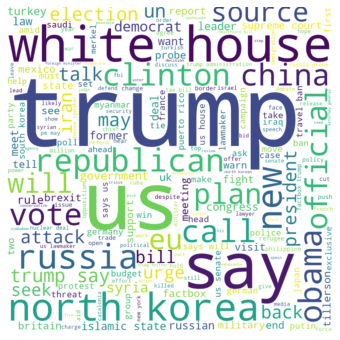

Fake Tweets Word Cloud


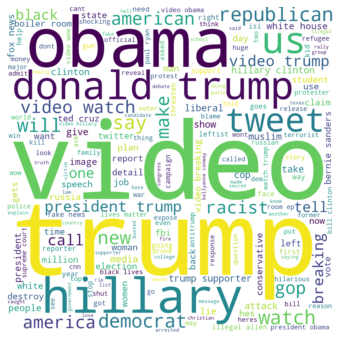

In [3]:
# a. Data visualisation
trueTitles = dfTrue['title'].str.cat(sep=' ')
fakeTitles = dfFake['title'].str.cat(sep=' ')

print("True Tweets Word Cloud")
wordcloudTrue = WordCloud(width = 1000, height = 1000,background_color="white").generate(trueTitles)
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloudTrue, interpolation='bilinear')
plt.axis("off")
plt.show()

print("Fake Tweets Word Cloud")
wordcloudFake = WordCloud(width = 1000, height = 1000,background_color="white").generate(fakeTitles)
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloudFake, interpolation='bilinear')
plt.axis("off")
plt.show()


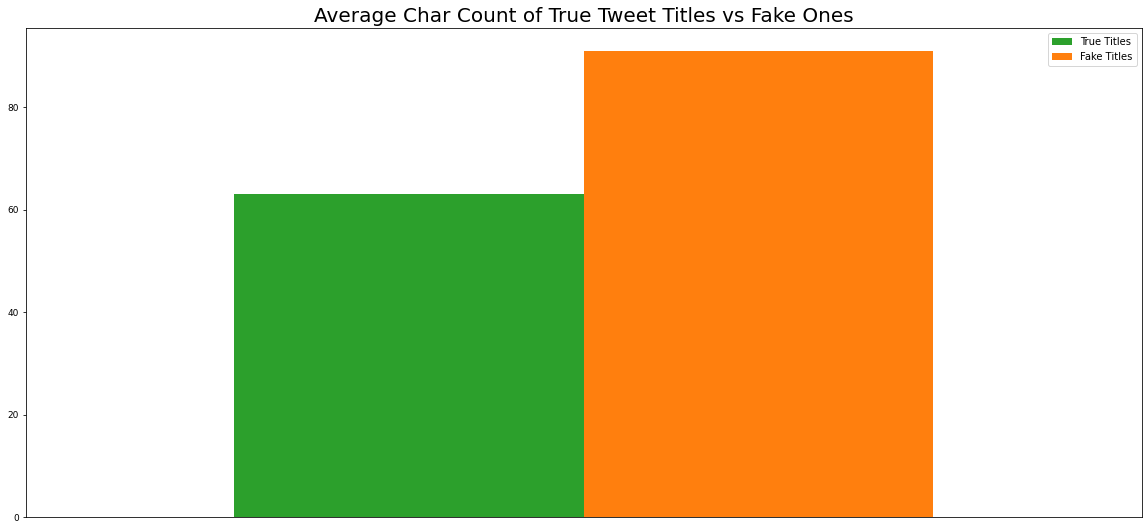

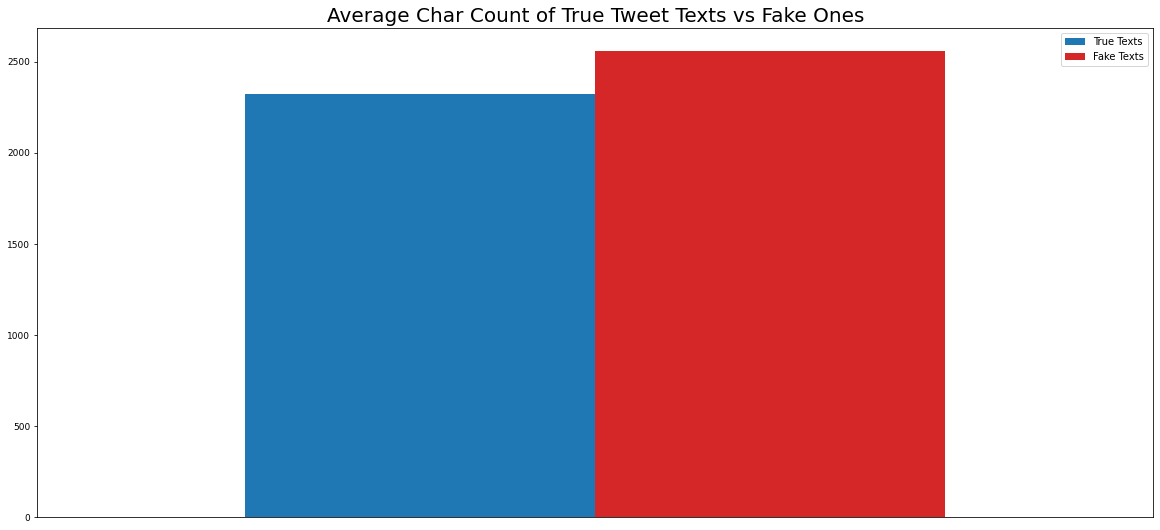

In [4]:
#b. Average character graphs in fake and true news
titleTrueCharsPerRow = dfTrue['title'].str.len()
titleFakeCharsPerRow = dfFake['title'].str.len()
# Get average of characters
titleTrueAverageChars = titleTrueCharsPerRow.mean()
titleFakeAverageChars = titleFakeCharsPerRow.mean()
# Plot
dfRes = pd.DataFrame({'True Titles':[titleTrueAverageChars], 'Fake Titles': [titleFakeAverageChars]})
dfRes.plot.bar(rot=0, width=0.84, fontsize=9, figsize=(20,9), color=['tab:green','tab:orange'])

curTitle = "Average Char Count of True Tweet Titles vs Fake Ones"
plt.title(curTitle, fontsize=20)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
# Same goes for text
textTrueCharsPerRow = dfTrue['text'].str.len()
textFakeCharsPerRow = dfFake['text'].str.len()

textTrueAverageChars = textTrueCharsPerRow.mean()
textFakeAverageChars = textFakeCharsPerRow.mean()

dfRes = pd.DataFrame({'True Texts':[textTrueAverageChars], 'Fake Texts': [textFakeAverageChars]})
dfRes.plot.bar(rot=0, width=0.84, fontsize=9, figsize=(20,9), color=['tab:blue', 'tab:red'])

curTitle = "Average Char Count of True Tweet Texts vs Fake Ones"
plt.title(curTitle, fontsize=20)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)

Text(0.5, 1.0, 'Word count of True Tweet Texts vs Fake Ones')

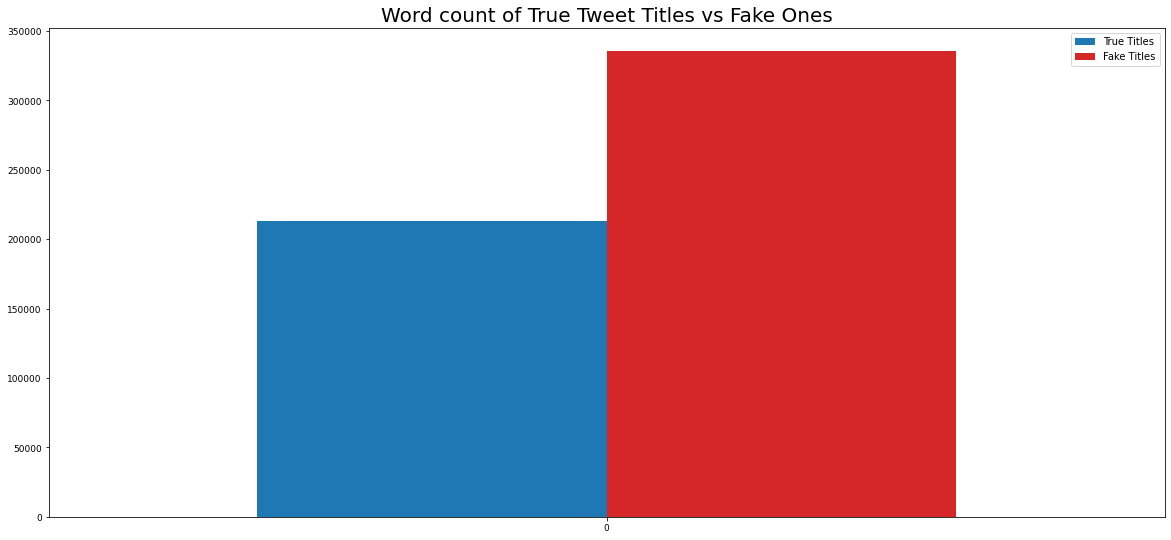

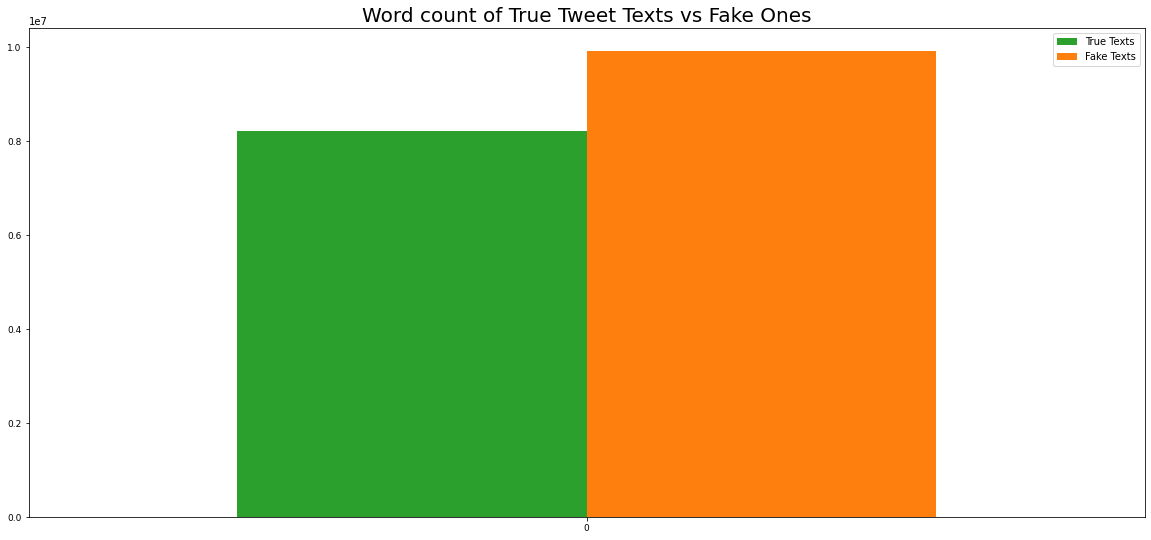

In [5]:
#c Display word counts of titles and texts for True and Fake tweets
titleTrueWords = len(dfTrue['title'].str.cat(sep=' ').split())
titleFakeWords = len(dfFake['title'].str.cat(sep=' ').split())

titleDF = pd.DataFrame({'True Titles':[titleTrueWords], 'Fake Titles': [titleFakeWords]})
titleDF.plot.bar(rot=0, width=0.84, fontsize=9, figsize=(20,9), color=['tab:blue', 'tab:red'])
curTitle = "Word count of True Tweet Titles vs Fake Ones"
plt.title(curTitle, fontsize=20)

textTrueWords = len(dfTrue['text'].str.cat(sep=' ').split())
textFakeWords = len(dfFake['text'].str.cat(sep=' ').split())

textDF = pd.DataFrame({'True Texts':[textTrueWords], 'Fake Texts': [textFakeWords]})
textDF.plot.bar(rot=0, width=0.84, fontsize=9, figsize=(20,9), color=['tab:green','tab:orange'])
curTitle = "Word count of True Tweet Texts vs Fake Ones"
plt.title(curTitle, fontsize=20)

Removed stopwords from dfTrue -> Column: title
Removed stopwords from dfTrue -> Column: text
Removed stopwords from dfFake -> Column: title
Removed stopwords from dfFake -> Column: text


Text(0.5, 1.0, 'Word count of True Tweet Texts vs Fake Ones')

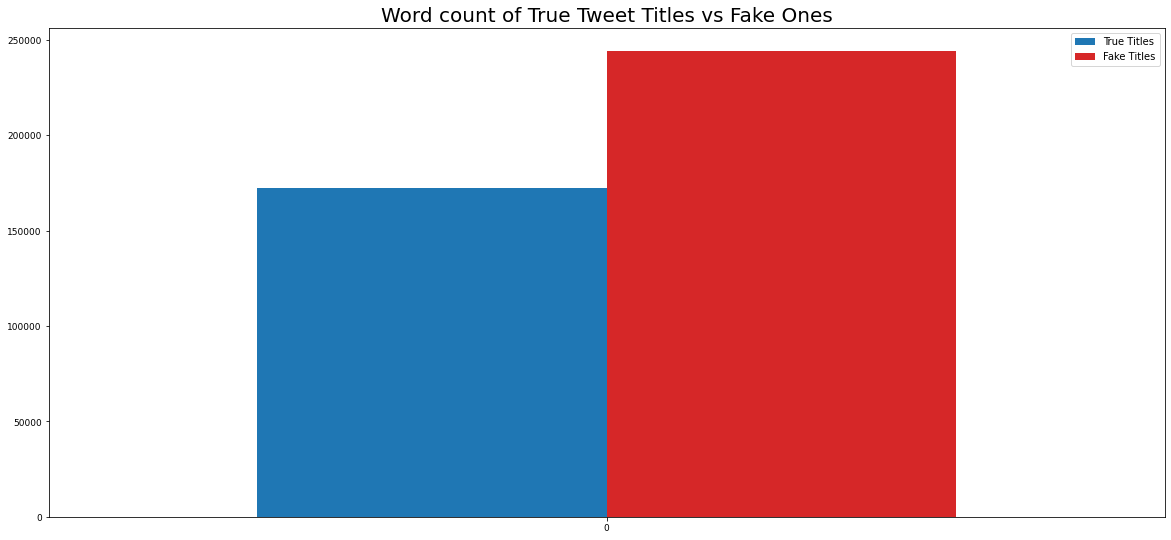

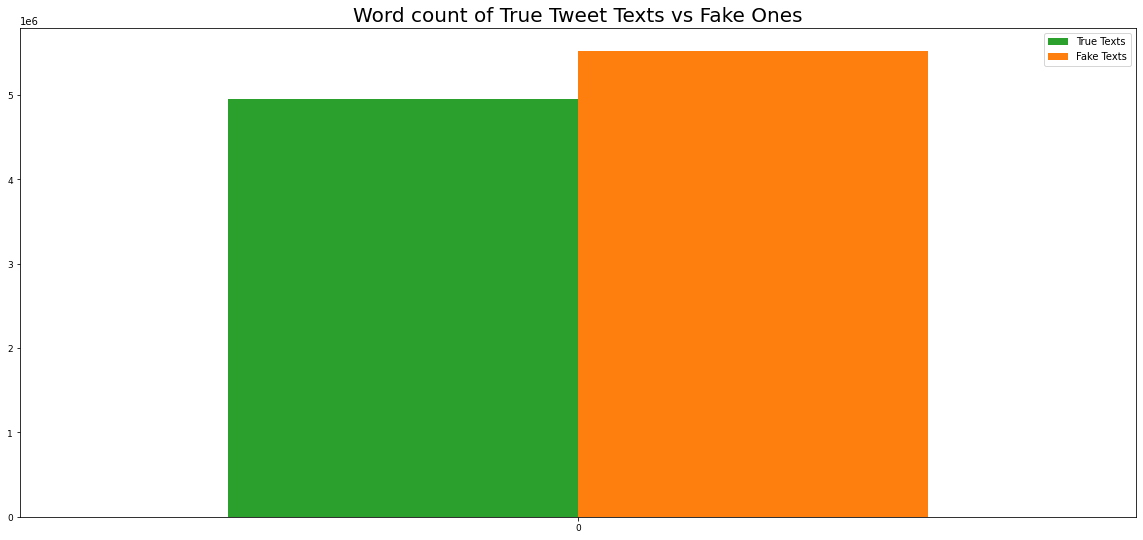

In [6]:
dfTrue['title'] = dfTrue['title'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
print("Removed stopwords from dfTrue -> Column: title")
dfTrue['text'] = dfTrue['text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
print("Removed stopwords from dfTrue -> Column: text")
dfFake['title'] = dfFake['title'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
print("Removed stopwords from dfFake -> Column: title")
dfFake['text'] = dfFake['text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
print("Removed stopwords from dfFake -> Column: text")

titleTrueWords = len(dfTrue['title'].str.cat(sep=' ').split())
titleFakeWords = len(dfFake['title'].str.cat(sep=' ').split())

titleDF2 = pd.DataFrame({'True Titles':[titleTrueWords], 'Fake Titles': [titleFakeWords]})
titleDF2.plot.bar(rot=0, width=0.84, fontsize=9, figsize=(20,9), color=['tab:blue', 'tab:red'])
curTitle = "Word count of True Tweet Titles vs Fake Ones"
plt.title(curTitle, fontsize=20)

textTrueWords = len(dfTrue['text'].str.cat(sep=' ').split())
textFakeWords = len(dfFake['text'].str.cat(sep=' ').split())

textDF2 = pd.DataFrame({'True Texts':[textTrueWords], 'Fake Texts': [textFakeWords]})
textDF2.plot.bar(rot=0, width=0.84, fontsize=9, figsize=(20,9), color=['tab:green','tab:orange'])
curTitle = "Word count of True Tweet Texts vs Fake Ones"
plt.title(curTitle, fontsize=20)


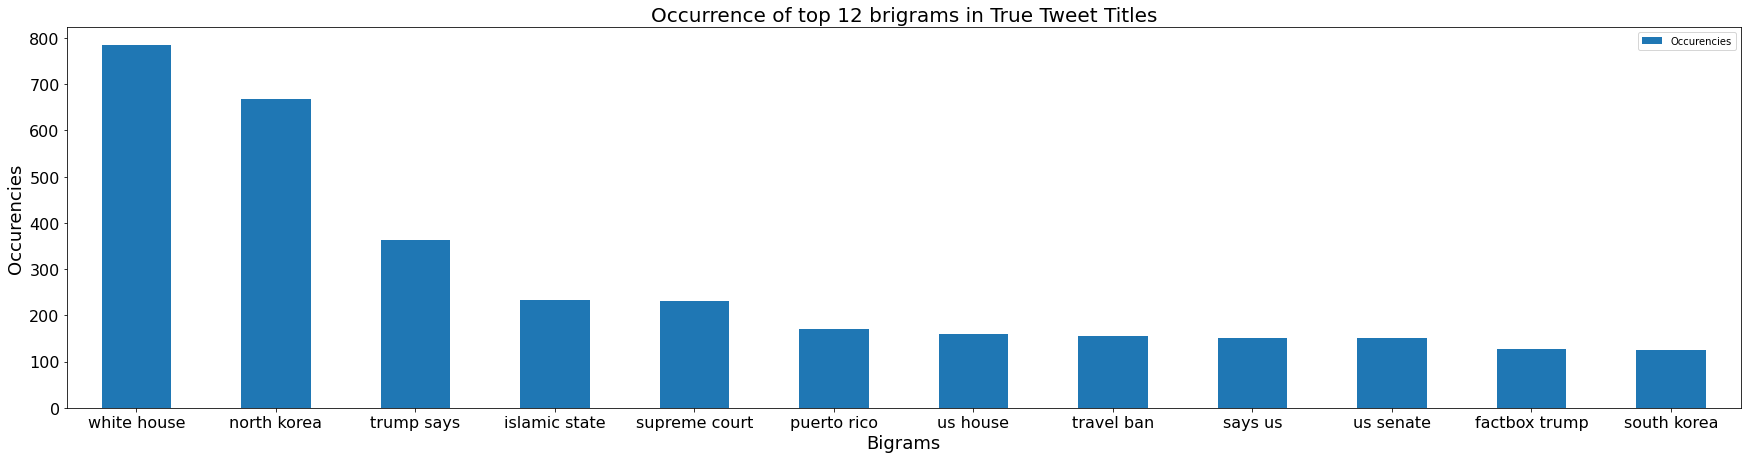

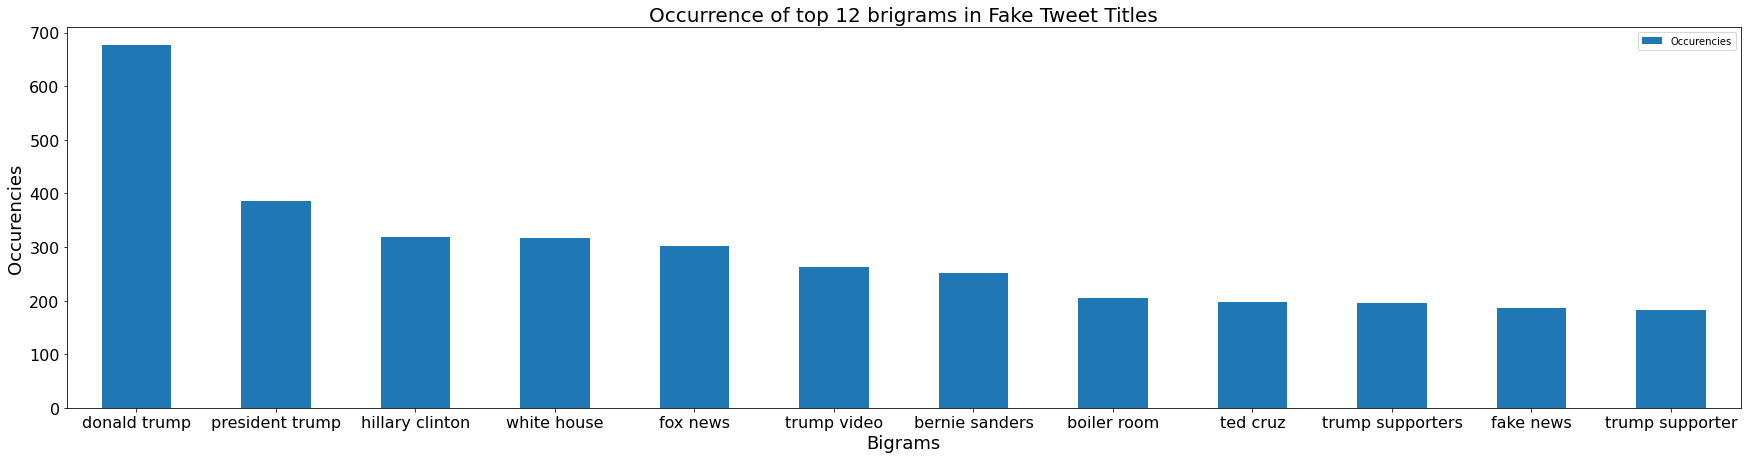

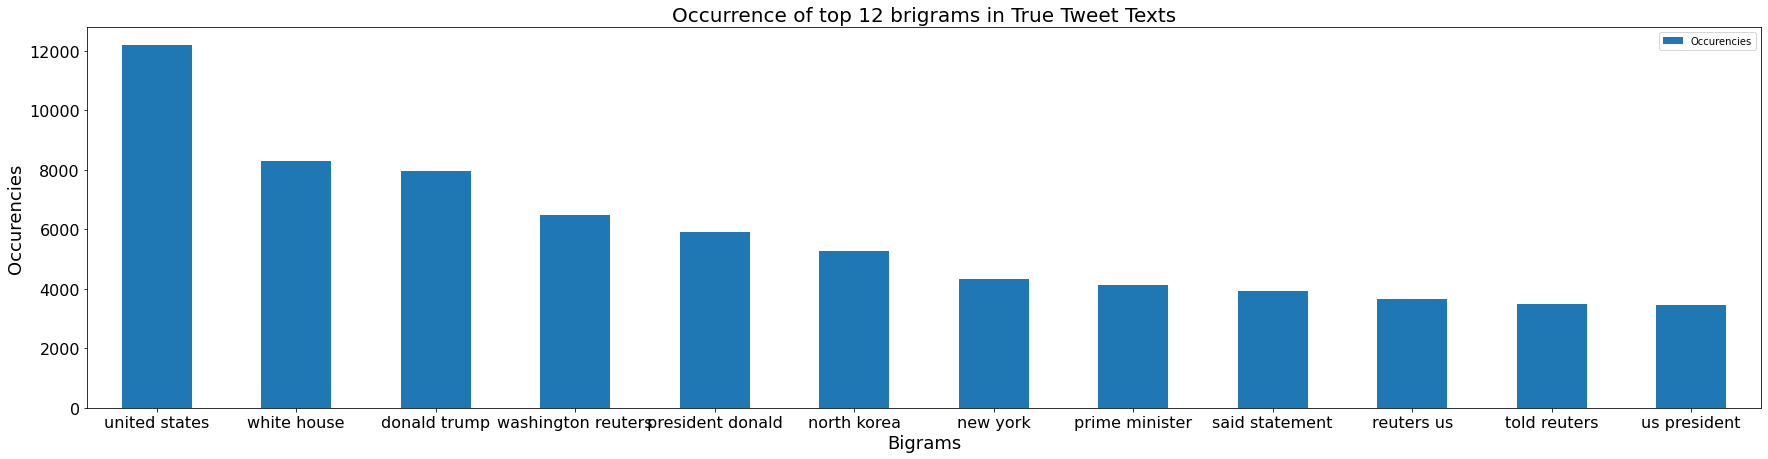

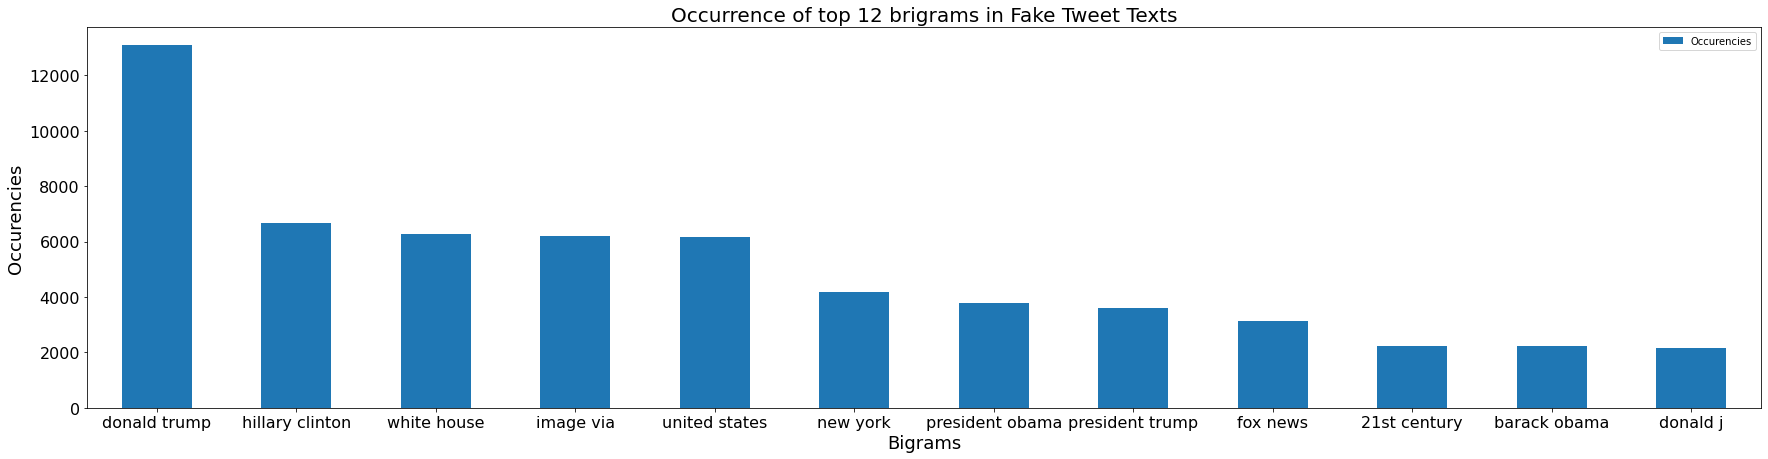

In [7]:
#Top 12 bigrams found in True Tweet Titles

def bigramFrequency(isTrue, newsType):

    # Bigram Function returns bigram array
    def bigram(row, tweetType):
        lst = []
        # Concat all news titles or texts in a string
        if newsType == 'Title':
            lst = row['title'].split(' ')
        else:
            lst = row['text'].split(' ')
        
        # return bigrams, the below return does the work
        return [(lst[x].strip(), lst[x+1].strip()) for x in range(len(lst)-1)]

    if isTrue == True:
        bigrams = dfTrue.apply(lambda row: bigram(row, newsType), axis=1)
    else:
        bigrams = dfFake.apply(lambda row: bigram(row, newsType), axis=1)
    # Make a dictionary with bigrams as keys and their frequency as values
    dic = {}
    for row in bigrams:
        for i in row:
            if i in dic:
                dic[i] += 1
            else:
                dic[i] = 1
    # Sort dict in descending order
    dict2 = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)}
    # Get first 12 keys in a list
    lista = list(dict2.keys())[:12]
    # Get the first 12 keys' values in another list
    lista2 = []
    for i in lista:
        lista2.append(dic[i])

    # Convert tuple ( str1, str2 ) in 'str1 str2' format
    lista = [ "%s %s" % x for x in lista ]
    # Make a dataframe from the 2 lists
    df = pd.DataFrame(zip(lista, lista2), columns=['Bigrams', 'Occurencies'])
    # Plot top 12 bigrams
    df.plot.bar(x='Bigrams', y='Occurencies', rot=0, figsize=(30, 7), fontsize=16)
    if(isTrue == True):
        plt.title("Occurrence of top 12 brigrams in True Tweet " + newsType + "s", fontsize=20)
    else:
        plt.title("Occurrence of top 12 brigrams in Fake Tweet " + newsType + "s", fontsize=20)
    plt.ylabel('Occurencies', size=18)
    plt.xlabel('Bigrams', size=18)
    
# Call for every combination
bigramFrequency(True, 'Title')
bigramFrequency(False, 'Title')
bigramFrequency(True, 'Text')
bigramFrequency(False, 'Text')

<h2>Δημιουργία συνόλου εκμάθησης και δοκιμής</h2>

In [8]:
dfTrue2 = dfTrue
dfTrue2['label'] = 1
dfFake2 = dfFake
dfFake2['label'] = 0

dfCombined = pd.concat([dfTrue2, dfFake2])
dfCombined2 = dfCombined.sample(frac=1)
# dfCombined = dfCombined2.head(20000)# comment later
dfCombined = dfCombined2
length = len(dfCombined.index)
# Save 70% of data in train.csv
dfCombined.head(int(length * 0.7)).to_csv('train.csv', index=False)
# Save rest of data in test.csv
dfCombined.tail(length - int(length * 0.7)).to_csv('test.csv', index=False)

# Read our new csv's
train_file = 'train.csv'
test_file = 'test.csv'
dfTrain = pd.read_csv(train_file)
dfTest =  pd.read_csv(test_file)

# Create our train and test labels and data
trainlabel = dfTrain['label'].to_numpy()
traindata = dfTrain.drop('label', axis=1)
testlabel = dfTest['label'].to_numpy()
testdata = dfTest.drop('label', axis=1)


<h1>2. Υλοποίηση κατηγοριοποίησης - Classification</h1>

In [9]:
import sklearn
import numpy as np
!pip install gensim
import gensim
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec

def extract_features_w2v(field, training_data, testing_data, trainlabel, testlabel):
    
    # Tokenize every text entry
    trainData = []
    for i in training_data[field]:
        temp = []
        if i:
          for j in word_tokenize(str(i)):
              temp.append(j)
          trainData.append(temp)
    
    
    testData = []
    for i in testing_data[field]:
        temp = []
        if i:
          for j in word_tokenize(str(i)):
              temp.append(j)
          testData.append(temp)

    # WORD2VEC
    model = gensim.models.Word2Vec(trainData, size=1000, seed=32, negative=5, sg=0, min_count=1, window=1)
    w2v = dict(zip(model.wv.index2word, model.wv.vectors))  

    X_train_document_vectors = np.array([np.mean([w2v[w] for w in words if w in w2v] or [np.zeros(len(next(iter(w2v.values()))))], axis=0) for words in trainData])
    
    X_test_document_vectors = np.array([np.mean([w2v[w] for w in words if w in w2v] or [np.zeros(len(next(iter(w2v.values()))))], axis=0) for words in testData])
    
    return X_train_document_vectors, X_test_document_vectors, trainlabel, testlabel

# X_train_Title_document_vectors, X_test_Title_document_vectors, train, test =  extract_features_w2v('text', traindata, testdata, trainlabel, testlabel)
# clf = LogisticRegression().fit(X_train_Title_document_vectors, train)
# predicted = clf.predict(X_test_Title_document_vectors)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
def extract_features_Bow_Tf_idf(field, training_data, testing_data):

    cv = CountVectorizer()
    cv.fit_transform(training_data[field].values.astype(str))

    X_train_counts = cv.transform(training_data[field].values.astype(str))
    X_test_counts = cv.transform(testing_data[field].values.astype(str))

    tfidf_transformer = TfidfTransformer()
    tfidf_transformer.fit_transform(X_train_counts)

    X_train_tfidf = tfidf_transformer.transform(X_train_counts)
    X_test_tfidf = tfidf_transformer.transform(X_test_counts)

    return X_train_counts, X_test_counts, X_train_tfidf, X_test_tfidf

In [11]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def printSVMOptimisedStats(X_train_features, X_test_features, Y_trainlabel, Y_testlabel):
    rbf = svm.SVC(kernel='rbf', gamma='scale', decision_function_shape='ovo').fit(X_train_features, Y_trainlabel)
    rbfKernelPrediction = rbf.predict(X_test_features)

    printAccuracyAndF1score('SVC with RBF kernel', Y_testlabel, rbfKernelPrediction)

    return

def printAccuracyAndF1score(modeStr, Y_testlabel, predicted):
    # print(modeStr, ' Accuracy: ', np.mean(predicted == Y_testlabel)*100, '%')
    print(modeStr, 'Accuracy:', accuracy_score(Y_testlabel,predicted)*100, '%')
    print(modeStr, 'f1 Score:', str(f1_score(Y_testlabel, predicted, average='macro')*10) + '/10\n')

    return


def printPredictionStats(mode ,X_train_features, X_test_features, Y_trainlabel, Y_testlabel):

    clf: object
    modeStr: str
    if mode == 'LR':
        clf = LogisticRegression(C=100, max_iter = 10000).fit(X_train_features, Y_trainlabel)
        modeStr = 'Logistic Regression'
    elif mode == 'NB':
        clf = MultinomialNB().fit(X_train_features , Y_trainlabel)
        modeStr = 'Multinomial Naive Bayes'
    elif mode == 'GausNB':
        clf = GaussianNB().fit(X_train_features , Y_trainlabel)
        modeStr = 'Gaussian Naive Bayes'
    elif mode == 'SVM':
        clf = svm.SVC().fit(X_train_features, Y_trainlabel)
        modeStr = 'Support Vector Machine'
    elif mode == 'SVM_Linear':
        clf = svm.LinearSVC(max_iter = 10000).fit(X_train_features, Y_trainlabel)
        modeStr = 'Linear SVC'
    elif mode == 'RF':
        clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_features, Y_trainlabel)
        modeStr = 'Random Forest'
    else:
        print('INVALID CLASSIFICATION MODE GIVEN!!')
        return

    predicted = clf.predict(X_test_features)
    
    printAccuracyAndF1score(modeStr, Y_testlabel, predicted)
    
    return

def printPredictionStats_For_All_Classifiers(field, traindata, testdata, trainlabel, testlabel):
    
    if field != 'title' and field != 'text':
        print('INVALID DATAFRAME FIELD')
        return

    classificationModeList = ['LR', 'NB', 'RF', 'SVM_Linear'];

    X_train_counts, X_test_counts, X_train_tfidf, X_test_tfidf = extract_features_Bow_Tf_idf(field, traindata, testdata)
 

    print('Classifier Stats for Bow Count Word Representation')
    print('========================================================')
    for classModel in classificationModeList:
        printPredictionStats(classModel, X_train_counts, X_test_counts, trainlabel, testlabel)
    printSVMOptimisedStats(X_train_counts, X_test_counts, trainlabel, testlabel)
   
    # print('\n')

    print('Classifier Stats for Tfidf Word Representation')
    print('========================================================')
    for classModel in classificationModeList:
        printPredictionStats(classModel, X_train_tfidf, X_test_tfidf, trainlabel, testlabel)
    printSVMOptimisedStats(X_train_tfidf, X_test_tfidf, trainlabel, testlabel)

    # print('\n')

    classificationModeList = ['LR', 'GausNB', 'RF', 'SVM_Linear'];

    X_train_document_vectors, X_test_document_vectors, Y_trainLabel, Y_testLavel = extract_features_w2v(field, traindata, testdata, trainlabel, testlabel)

    print('Classifier Stats for w2vec Word representation')
    print('========================================================')
    for classModel in classificationModeList:
        printPredictionStats(classModel, X_train_document_vectors, X_test_document_vectors, Y_trainLabel, Y_testLavel)
    printSVMOptimisedStats(X_train_document_vectors, X_test_document_vectors, Y_trainLabel, Y_testLavel)

import time
start = time.time()
printPredictionStats_For_All_Classifiers('text', traindata, testdata, trainlabel, testlabel)
end = time.time()
print("\nTime consumed in working: ", end - start, 'seconds')





Classifier Stats for Bow Count Word Representation
Logistic Regression Accuracy: 99.59343472368619 %
Logistic Regression f1 Score: 9.959314243268683/10

Multinomial Naive Bayes Accuracy: 96.22044872760127 %
Multinomial Naive Bayes f1 Score: 9.621931502482123/10

Random Forest Accuracy: 84.42252672790242 %
Random Forest f1 Score: 8.389356449316931/10

Linear SVC Accuracy: 99.60096371028459 %
Linear SVC f1 Score: 9.960067844264378/10

SVC with RBF kernel Accuracy: 99.31486221954525 %
SVC with RBF kernel f1 Score: 9.931429204242582/10

Classifier Stats for Tfidf Word Representation
Logistic Regression Accuracy: 99.32992019274207 %
Logistic Regression f1 Score: 9.932945190022597/10

Multinomial Naive Bayes Accuracy: 94.63936154193645 %
Multinomial Naive Bayes f1 Score: 9.463837681833594/10

Random Forest Accuracy: 84.1740701701551 %
Random Forest f1 Score: 8.362599449508776/10

Linear SVC Accuracy: 99.3901520855293 %
Linear SVC f1 Score: 9.938972588672252/10

SVC with RBF kernel Accuracy: 

####  **Σχόλια:**
#### Παρατηρούμε ότι ο αγώνας για την πρώτη θέση είναι ανάμεσα στο Logistic Regression και το SVΜ ανάλογα το representation. Ο Naive Bayes ακολουθεί κοντά από πίσω στην τρίτη θέση, ενώ τα Random Forests έχουν πάντα την χειρότερη βαθμολογία ανεξαρτήτως του representation που θα χρησιμοποιηθεί. Επίσης, τα μοντέλα που παίρνουν το average των διανυσμάτων όπως το word to vector δίνουν αρκετά καλά αποτελέσματα, ειδικά αν σκεφτούμε και το πόση πληροφορία χάνεται σε αυτή τη διαδικασία. Τέλος, ο SVC παρά την πολύ καλή του απόδοση, παίρνει και πάρα πολύ χρόνο, βάζοντας τον τελευταίο σε μία κατάταξη βάση του πηλίκου accuracy/time.

####  **Λόγοι αστοχίας:**
#### Σχετικά με τους πιθανούς **λόγους αστοχίας** ενός μοντέλου, ένας θα μπορούσε να είναι το overfitting, σε περιπτώσεις το training ενός μοντέλου, έχει γίνει τόσο 'κατά γράμμα', έτσι ώστε να μην είναι τόσο αξιόπιστο στις μελλοντικές παρατηρήσεις και χρήσεις του, με νέα δεδομένα. Αντίστοιχα, μπορούμε να έχουμε και underfitting ενός μοντέλου, όπου το training μπορεί να είναι ανεπαρκές, και να μην είναι αντίστοιχα όσο αντικατοπτριστικό όσο θα θέλαμε.
#### Τα μοντέλα που δημιουργήσαμε για την εργασία μας, είναι πολωμένα σε πολιτικούς όρους, και θέματα. Γενικά, όταν τα training data μας δεν είναι αρκετά διευρυμένα, έχουμε πολύ μεγάλη πιθανότητα αστοχίας, σε διαφορετικού είδους νέα από τα συνηθισμένα. 
#### Τα μοντέλα μας πρέπει να αποτελούν μια αναπαράσταση της πραγματικότητας. Επομένως, αν δεν έχουμε χρησιμοποιήσει τις κατάλληλες μεθόδους για το πρόβλημα μας, ώστε να πάρουμε την καλύτερη αναπαράσταση κάθε φορά, θα έχουμε εξαρχής χτίσει τα λάθος θεμέλια για ένα σωστό μοντέλο. Παρόλα αυτά, στην δικιά μας περίπτωση, οι classifiers και τα word representations που επιλέξαμε, φαίνεται να αποδίδουν αρκετά καλά για τα δεδομένα μας.
#### Τέλος, σε περιπτώσεις που τα outcomes που αναμένουμε δεν είναι binary, η δημιουργία ενός πιο ακριβούς μοντέλου, είναι μια πιο δύσκολη διαδικασία. Στην περίπτωση μας, τα outcomes ήταν μόνο True or Fake, κάτι που συμβάλει σημαντικά στην πολύ καλή απόδοση που έχουμε. 

#### **Σχεδιαστικές επιλογές:**
#### Όσον αφορά τις αναπαραστάσεις bow/tfidf και τον NB Classifier, χρησιμοποιήσαμε την Multinomial εκδοχή του, όπως αναφέρθηκε και στο e-class, ενώ για την Word2Vec αναπαράσταση χρησιμοποιήσαμε την Gaussian εκδοχή, καθώς δέχεται και αρνητικές τιμές όπου προκύπτουν.

#### Όσον αφορά τον SVM Classifier, επιλέξαμε να παρουσιάσουμε δύο εκδοχές του, με rbf kernel, και linear kernel. Αυτό το κάναμε, για να αναδείξουμε πως ο SVM με Linear Kernel, μας φέρνει καλύτερα αποτελέσματα, σε πολύ μικρότερο χρόνο. Από τον χρόνο εκτέλεσης που φαίνεται παραπάνω, ο περισσότερος χρόνος ξοδεύτηκε στους υπολογισμούς του SVM με RBF Kernel.



In [12]:
dfCombined = dfCombined2.head(1000)# comment later
length = len(dfCombined.index)
dfCombined.head(int(length * 0.8)).to_csv('trainSmall.csv', index=False)
dfCombined.tail(length - int(length * 0.8)).to_csv('testSmall.csv', index=False)

train_file = 'trainSmall.csv'
test_file = 'testSmall.csv'
dfTrain = pd.read_csv(train_file)
dfTest =  pd.read_csv(test_file)

trainlabel = dfTrain['label'].to_numpy()
traindata = dfTrain.drop('label', axis=1)
testlabel = dfTest['label'].to_numpy()
testdata = dfTest.drop('label', axis=1)

X_train_counts, X_test_counts, X_train_tfidf, X_test_tfidf = extract_features_Bow_Tf_idf('text', traindata, testdata)
X_train_document_vectors, X_test_document_vectors, Y_trainLabel, Y_testLavel = extract_features_w2v('text', traindata, testdata, trainlabel, testlabel)

X_train_features = X_train_document_vectors
X_test_features = X_test_document_vectors

Y_trainlabel = trainlabel
Y_testlabel = testlabel

print('- SVC with Kernel Parameters -')
# =========================== SVC WITH LINEAR KERNEL ==================================
# =============================== BIG C ============================================

linear = svm.SVC(kernel='linear', C=100000, decision_function_shape='ovo').fit(X_train_features, Y_trainlabel)
linerKernelPrediction = linear.predict(X_test_features)

printAccuracyAndF1score('SVC with Linear kernel : C = 100000', Y_testlabel, linerKernelPrediction)

# =============================== SMALL C ==========================================

linear = svm.SVC(kernel='linear', C=0.00001, decision_function_shape='ovo').fit(X_train_features, Y_trainlabel)
linerKernelPrediction = linear.predict(X_test_features)

printAccuracyAndF1score('SVC with Linear kernel : C = 0.00001', Y_testlabel, linerKernelPrediction)

print()

# =========================== SVC WITH RBF KERNEL ====================================

# =============================== BIG C ============================================

rbf = svm.SVC(kernel='rbf', gamma='scale', C=100000, decision_function_shape='ovo').fit(X_train_features, Y_trainlabel)
rbfKernelPrediction = rbf.predict(X_test_features)

printAccuracyAndF1score('SVC with RBF kernel : Gamma = Scale, C = 100000', Y_testlabel, rbfKernelPrediction)

rbf = svm.SVC(kernel='rbf', gamma=1, C=100000, decision_function_shape='ovo').fit(X_train_features, Y_trainlabel)
rbfKernelPrediction = rbf.predict(X_test_features)

printAccuracyAndF1score('SVC with RBF kernel : Gamma = 1, C = 100000', Y_testlabel, rbfKernelPrediction)

rbf = svm.SVC(kernel='rbf', gamma='auto', C=100000, decision_function_shape='ovo').fit(X_train_features, Y_trainlabel)
rbfKernelPrediction = rbf.predict(X_test_features)

printAccuracyAndF1score('SVC with RBF kernel : Gamma = auto, C = 100000', Y_testlabel, rbfKernelPrediction)

# ============================== SMALL C ============================================

rbf = svm.SVC(kernel='rbf', gamma='scale', C=0.000001, decision_function_shape='ovo').fit(X_train_features, Y_trainlabel)
rbfKernelPrediction = rbf.predict(X_test_features)

printAccuracyAndF1score('SVC with RBF kernel : Gamma = Scale, C = 0.000001', Y_testlabel, rbfKernelPrediction)

rbf = svm.SVC(kernel='rbf', gamma=1, C=0.000001, decision_function_shape='ovo').fit(X_train_features, Y_trainlabel)
rbfKernelPrediction = rbf.predict(X_test_features)

printAccuracyAndF1score('SVC with RBF kernel : Gamma = 1, C = 0.000001', Y_testlabel, rbfKernelPrediction)

rbf = svm.SVC(kernel='rbf', gamma='auto', C=0.000001, decision_function_shape='ovo').fit(X_train_features, Y_trainlabel)
rbfKernelPrediction = rbf.predict(X_test_features)

printAccuracyAndF1score('SVC with RBF kernel : Gamma = auto, C = 0.000001', Y_testlabel, rbfKernelPrediction)







- SVC with Kernel Parameters -
SVC with Linear kernel : C = 100000 Accuracy: 96.5 %
SVC with Linear kernel : C = 100000 f1 Score: 9.649991249781245/10

SVC with Linear kernel : C = 0.00001 Accuracy: 51.5 %
SVC with Linear kernel : C = 0.00001 f1 Score: 3.3993399339933994/10


SVC with RBF kernel : Gamma = Scale, C = 100000 Accuracy: 96.0 %
SVC with RBF kernel : Gamma = Scale, C = 100000 f1 Score: 9.599639675708138/10

SVC with RBF kernel : Gamma = 1, C = 100000 Accuracy: 97.5 %
SVC with RBF kernel : Gamma = 1, C = 100000 f1 Score: 9.749943737340901/10

SVC with RBF kernel : Gamma = auto, C = 100000 Accuracy: 80.0 %
SVC with RBF kernel : Gamma = auto, C = 100000 f1 Score: 7.994987468671679/10

SVC with RBF kernel : Gamma = Scale, C = 0.000001 Accuracy: 51.5 %
SVC with RBF kernel : Gamma = Scale, C = 0.000001 f1 Score: 3.3993399339933994/10

SVC with RBF kernel : Gamma = 1, C = 0.000001 Accuracy: 51.5 %
SVC with RBF kernel : Gamma = 1, C = 0.000001 f1 Score: 3.3993399339933994/10

SVC wi

#### Παραπάνω βλέπουμε μερικά πειραματικά classifications που κάναμε χρησιμοποιώντας τον SVM με Linear και RBF Kernel. Παρατηρούμε πως για μεγάλο C τα αποτελέσματα μας, είναι σαφώς καλύτερα και έχουν μεγαλύτερο ποοσοστό επιτυχίας, όπως και περιμέναμε. Στην συνέχεια, για δίαφορες τιμές του gamma στον rbf kernel, παρατηρήσαμε πως τα καλύτερα αποτελέσματα τα είχαμε με την 'scale' παράμετρο. Τέλος, με τον συνδυασμό μεγάλου C στον linear kernel, και μεγάλου C στον Rbf με gamma='scale' παίρναμε πάντα το ίδιο καλύτερα αποτελέσματα, ανεξαρτήτως representation των κειμένων μας. Μετά απο αρκετούς πειραματισμούς, οι οποίοι δεν εμφανίζονται όλοι παραπάνω, καταλήξαμε στους συνδυασμούς, που μας δίνουν την βέλτιστη απόδοση μεταξύ χρόνου και αποτελεσμάτων, και οι οποίοι χρησιμοποιούνται από τις κύριες συναρτήσεις παραπάνω.

###**Beat The Benchmark**
#### Όσων αφορά την βελτιστοποίηση των classifiers της εργασίας, παρατηρούμε πως σε σχέση με τις επιλογές που κάναμε, περί παραμετροποίησης των classifiers, την απλοποίηση των κειμένων, με αφαίρεση κεφαλαίων, σημείων στίξης και stopwords, πήραμε πολύ καλά αποτελέσματα. Αυτό δεν σημαίνει πως δεν υπάρχουν ακόμα περιθώρια βελτίωσης, καθώς δεν ξέρουμε ποσο καλά θα λειτουργήσουν οι classifiers για νέα δεδομένα εκτός του train και test set. Για τα συγκεκριμένα δεδομένα και για μια αναλογία 70-30 % στους όγκους των test και train set, τα αποτελέσματα μας φαίνονται επαρκή, και δεν μπορέσαμε να αντλήσουμε παραπάνω τρόπους η παραμέτρους που θα μας έδιναν καλύτερα αποτελέσματα, εκτος από αυτούς που χρησιμοποιήθηκαν παραπάνω για τους underperfoming classifiers μας. Μερικές άλλες παραμετροποιήσεις που λείπουν, παρόλο που δοκιμάστικαν για διάφορες τιμές, είδαμε μηδαμινές αλλαγές στην απόδοση των classifiers.

## **Επίλογος:**
#### Στην συγκεκριμένη εργασία, ασχοληθήκαμε με την ανάλυση άρθρων και την απόσπαση πληροφορίας από αυτά, για να καθορίσουμε αν διαπραγματεύονται μια πραγματική ή μια φανταστική είδηση όπως επίσης και να αντλήσουμε ποια θέματα διαπραγματεύονται μέσω word clouds και frequency plots. Τέλος, είδαμε πόσο σημαντική είναι η σωστή μορφοποίηση των δεδομένων για την καλύτερη προσαρμογή τους πάνω στο πρόβλημα που θέλουμε να λύσουμε. Αφαιρώντας τα stopwords, τα σημεία στίξης, μετατρέποντας όλα τα γράμματα σε μικρά, και επιλέγοντας τα σωστά αριθμητικά word representations, μπορέσαμε να πάρουμε πολύ καλά αποτελέσματα στα classifications που κάναμε, και να καταλάβουμε, αν μια είδηση, ήταν πραγματικά αληθής ή ψευδής.  
####Σας ευχαριστούμε πολύ για τον χρόνο σας, καλή διόρθωση :)